# Visualizing Single NC L3 file

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
# set the font globally
plt.rcParams.update({'font.family':'Arial'})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2
# update the overall font size
plt.rcParams.update({'font.size':11})
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import netCDF4 as nc

In [36]:
def open_aqua_modis_file(file_path):
    try:
        dataset = nc.Dataset(file_path)
        return dataset
    except Exception as e:
        print(f"Error opening file: {e}")
        return None

file_name = "./data/requested_files/AQUA_MODIS.20230421.L3m.DAY.CHL.NRT.x_chlor_a.nc"
dataset = open_aqua_modis_file(file_name)

if dataset:
    print(f"File {file_name} opened successfully:")
    print(dataset)
else:
    print(f"Failed to open file {file_name}")

File ./data/requested_files/AQUA_MODIS.20230421.L3m.DAY.CHL.NRT.x_chlor_a.nc opened successfully:
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: AQUA_MODIS.20230421.L3m.DAY.CHL.NRT.x_chlor_a.nc
    instrument: MODIS
    title: MODISA Level-3 Equidistant Cylindrical Mapped Image
    project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
    platform: Aqua
    source: satellite observations from MODIS-Aqua
    temporal_range: day
    processing_version: Unspecified
    date_created: 2023-04-26T15:10:50.000Z
    history: l3mapgen par=AQUA_MODIS.20230421.L3m.DAY.CHL.NRT.x_chlor_a.nc.param 
    l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
    time_coverage_start: 2023-04-21T00:50:01.000Z
    time_coverage_end: 2023-04-22T01:49:59.000Z
    start_orbit_number: 111548
    end_orbit_number: 111563
    map_projection: PlateCarree
   

In [39]:
def prep_data_plot(dataset):
    chlor_a = dataset.variables['chlor_a']
    fill_value = chlor_a._FillValue
    valid_min = chlor_a.valid_min
    valid_max = chlor_a.valid_max

    masked_chlor_a = np.ma.masked_outside(chlor_a, valid_min, valid_max)
    masked_chlor_a = np.ma.masked_values(masked_chlor_a, fill_value)
    
    return {
        "chlor_a": masked_chlor_a,
        "display_min": chlor_a.display_min,
        "display_max": chlor_a.display_max,
    }

(568, 439)
(568, 439)
(568, 439)
(568, 439)
(568, 439)


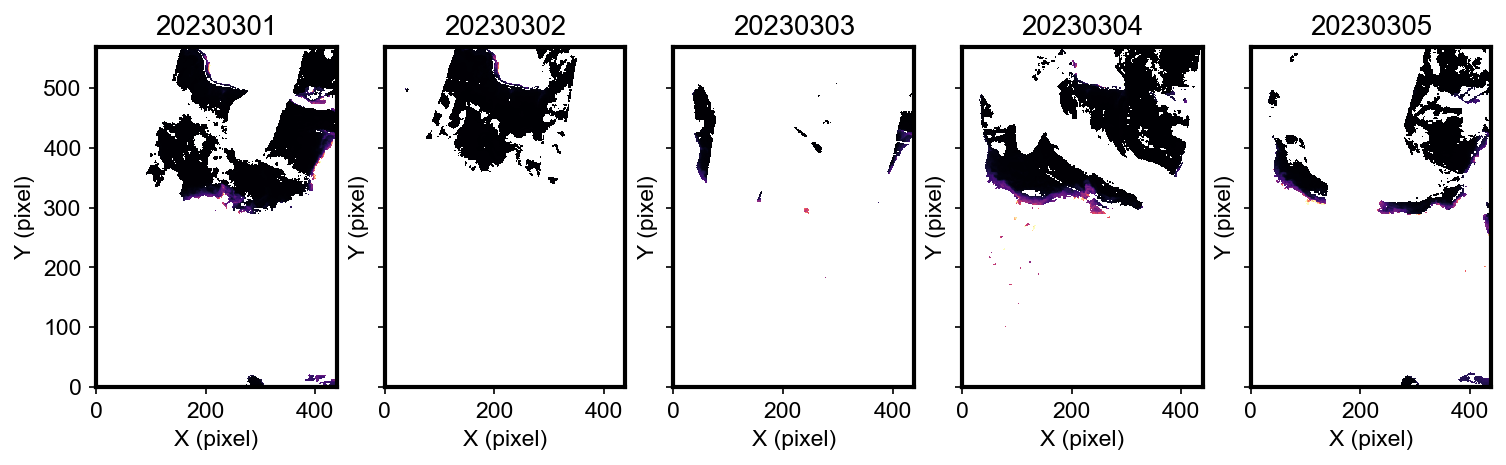

In [68]:
fig, ax = plt.subplots(1,5, figsize = (12,3), dpi = 150, sharex = True, sharey = True)

files = sorted(os.listdir("./data/requested_files/"))

for i in range(5):
    dataset = open_aqua_modis_file(f"./data/requested_files/{files[i]}")
    plot_prep = prep_data_plot(dataset)
    
    print(plot_prep['chlor_a'].shape)
    
    ax[i].pcolormesh(plot_prep['chlor_a'], cmap='magma', vmin=plot_prep['display_min'], vmax=plot_prep['display_max'], shading='auto')
    ax[i].set_xlabel('X (pixel)')
    ax[i].set_ylabel('Y (pixel)')
    ax[i].set_title(files[i].split(".")[1])

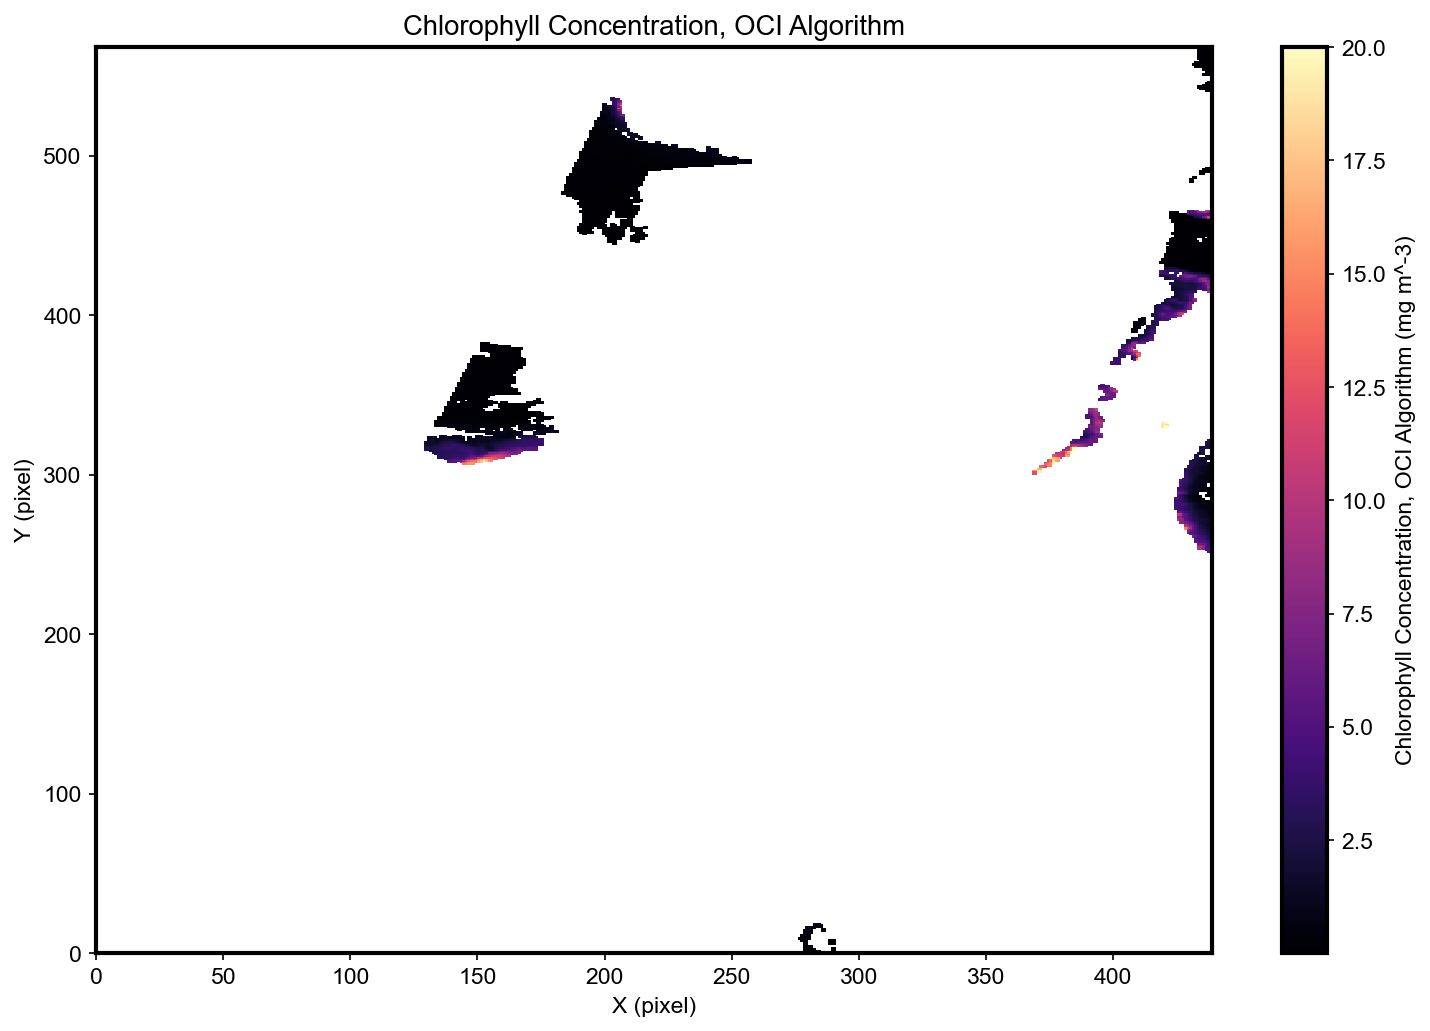

In [59]:
# Plot the masked data
plt.figure(figsize=(12, 8), dpi = 150)
plt.pcolormesh(masked_chlor_a, cmap='magma', vmin=chlor_a.display_min, vmax=chlor_a.display_max, shading='auto')
plt.colorbar(label=f"{chlor_a.long_name} ({chlor_a.units})")
plt.title(chlor_a.long_name)
plt.xlabel('X (pixel)')
plt.ylabel('Y (pixel)')
plt.show()